## **Summary**

Music therapy, or MT, is the use of music to improve an individual's stress, mood, and overall mental health. MT is also recognized as an evidence-based practice, using music as a catalyst for "happy" hormones such as oxytocin.

However, MT employs a wide range of different genres, varying from one organization to the next.

The MxMH dataset aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health. Ideally, these findings could contribute to a more informed application of MT or simply provide interesting sights about the mind.

### **Importing Libraries**

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
sns.set(color_codes = True)   
sns.set_palette(palette = 'bright', n_colors = 8)

### **Importing Dataset**

In [166]:
data = pd.read_csv('/kaggle/input/mxmh-survey-results/mxmh_survey_results.csv')
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


### **Checking Dataset**

In [167]:
data.shape

(736, 33)

In [168]:
data.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

This dataset has 33 columns.

Out of 33 columns 26 columns are *Object* type and rest are *Numeric* type.

In [170]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


The range of music listeners are from 10 to 89.

The 3rd quartile and max of *Age*,  *Hours per day*, and *BPM* has a big difference. This shows it has outliers.

In [171]:
data.describe(exclude='number').T

,count,unique,top,freq
Timestamp,736,735,8/28/2022 16:15:08,2
Primary streaming service,735,6,Spotify,458
While working,733,2,Yes,579
Instrumentalist,732,2,No,497
Composer,735,2,No,609
Fav genre,736,16,Rock,188
Exploratory,736,2,Yes,525
Foreign languages,732,2,Yes,404
Frequency [Classical],736,4,Rarely,259
Frequency [Country],736,4,Never,343


It Tell us that Rock is most loved genre with 330 people answering that they listen it it very frequently.
<br>
Gospel is genre which most people never listened too.

The *Timestamp* column has a lot of unique value whereas *Permission* column has only one unique value.

### **Removing Outliers**

In [172]:
age_index = data[(data['Age'] > 70)].index
data = data.drop(age_index, axis=0)

In [173]:
hpd_index = data[data['Hours per day'] >= 15].index
data = data.drop(hpd_index, axis=0)

In [174]:
data_index = data[data['BPM'] > 200].index
data = data.drop(data_index, axis=0)

### **Removing Not Needed Columns**

In [175]:
data.drop(['Timestamp', 'Permissions'], axis=1, inplace=True)

### **Checking the Correlation**

In [176]:
corr_data = data.corr()['Age']
corr_data.sort_values()

Anxiety         -0.147222
OCD             -0.123097
Hours per day   -0.098354
Depression      -0.087602
BPM             -0.019868
Insomnia         0.039365
Age              1.000000
Name: Age, dtype: float64

<AxesSubplot:>

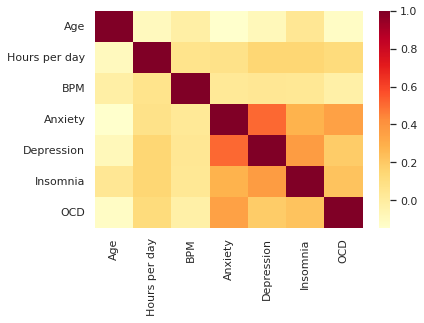

In [177]:
sns.heatmap(data.corr(), cmap = 'YlOrRd')

### **Removing Missing Values**

In [178]:
data.isnull().sum()

Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             105
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [179]:
data['Age'] = data['Age'].fillna(round(data['Age'].mean(), 0))
data['Primary streaming service'] = data['Primary streaming service'].fillna(data['Primary streaming service'].mode()[0])
data['While working'] = data['While working'].fillna(data['While working'].mode()[0])
data['Instrumentalist'] = data['Instrumentalist'].fillna(data['Instrumentalist'].mode()[0])
data['Composer'] = data['Composer'].fillna(data['Composer'].mode()[0])
data['Foreign languages'] = data['Foreign languages'].fillna(data['Foreign languages'].mode()[0])
data['Music effects'] = data['Music effects'].fillna(data['Music effects'].mode()[0])

In [180]:
miss_bpm = data[data['BPM'].isnull() == True]
miss_bpm

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
10,18.0,Spotify,3.0,Yes,Yes,No,Country,Yes,No,NaN,...,Rarely,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect
12,25.0,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,NaN,...,Sometimes,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve
15,17.0,Spotify,2.0,No,No,No,Pop,Yes,Yes,NaN,...,Very frequently,Rarely,Sometimes,Sometimes,Rarely,7.0,5.0,4.0,1.0,Worsen
30,20.0,Apple Music,5.0,Yes,Yes,No,Rock,Yes,Yes,NaN,...,Sometimes,Sometimes,Sometimes,Very frequently,Rarely,7.0,7.0,2.0,0.0,Improve
32,19.0,Spotify,6.0,Yes,Yes,No,Metal,Yes,Yes,NaN,...,Sometimes,Never,Never,Sometimes,Sometimes,9.0,8.0,2.0,3.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,18.0,Spotify,4.0,Yes,No,No,R&B,No,No,NaN,...,Sometimes,Very frequently,Sometimes,Never,Never,8.0,0.0,0.0,2.0,No effect
700,20.0,YouTube Music,1.0,Yes,No,No,Pop,No,Yes,NaN,...,Very frequently,Rarely,Sometimes,Rarely,Very frequently,8.0,9.0,6.0,5.0,Worsen
706,23.0,Spotify,1.0,Yes,Yes,No,Rock,Yes,Yes,NaN,...,Very frequently,Sometimes,Sometimes,Very frequently,Very frequently,8.0,6.0,1.0,4.0,Improve
712,23.0,I do not use a streaming service.,3.0,Yes,No,No,Rock,No,No,NaN,...,Sometimes,Rarely,Never,Very frequently,Never,10.0,5.0,2.0,0.0,Improve


In [181]:
miss_bpm['Fav genre'].unique()

array(['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical',
       'Video game music', 'R&B', 'Folk', 'Jazz', 'EDM', 'Gospel',
       'K pop', 'Rap'], dtype=object)

In [182]:
miss_bpm_genre = ['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical',
       'Video game music', 'R&B', 'Folk', 'Jazz', 'EDM', 'Gospel',
       'K pop', 'Rap']

In [183]:
for i in miss_bpm_genre:
  data['BPM'] = data['BPM'].fillna(round(data[data['Fav genre']== i ]['BPM'].mean(), 0))

### **Checking Dataset and Creating Copy**

In [184]:
data.shape

(714, 31)

In [185]:
df = data.copy()

### **Data Visualization**

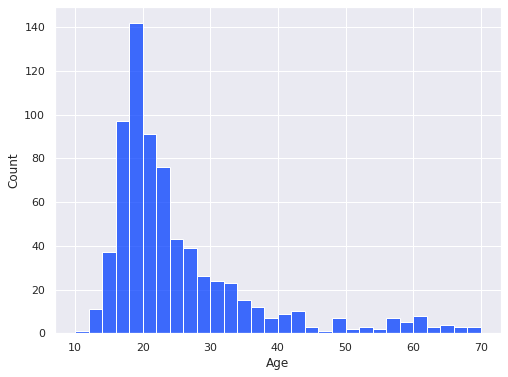

In [186]:
plt.figure(figsize=(8,6))
sns.histplot(data['Age']).figure.savefig("1.png")

People of age 16 - 24 are more frequently listening music.

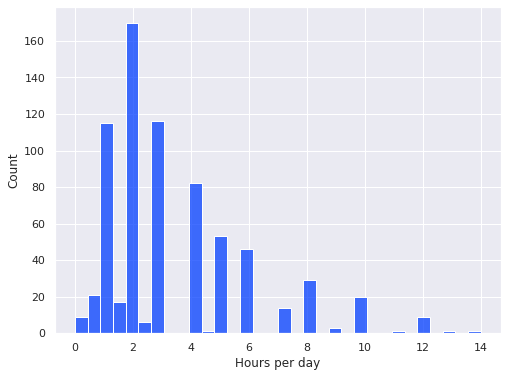

In [187]:
plt.figure(figsize=(8,6))
sns.histplot(data['Hours per day']).figure.savefig("2.png")

People working for 1-3 hours tend to hear music more than working more hours.

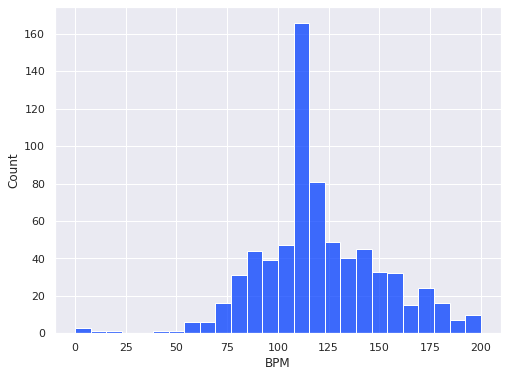

In [188]:
plt.figure(figsize=(8,6))
sns.histplot(data['BPM']).figure.savefig("3.png")

Most songs heard between the range of 100-125 BPM.

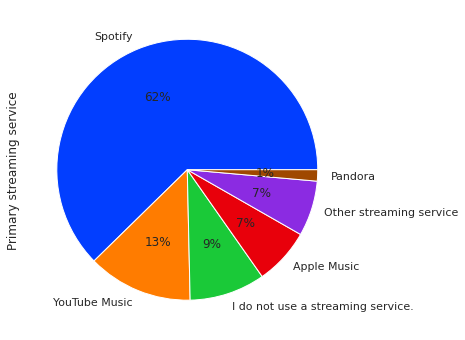

In [189]:
plt.figure(figsize=(8,6))
data['Primary streaming service'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.savefig('4.png')

This clearly shows *Spotify* is the most used streaming service.

# Fav Genre

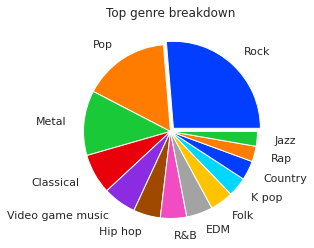

In [190]:
genre = data["Fav genre"].value_counts().loc[lambda x: x>10]
genre.plot(kind='pie', labeldistance = 1.2, 
            explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], 
            colors = sns.color_palette('bright')[0:13])

plt.title('Top genre breakdown')
plt.ylabel("")
plt.savefig('5.png')

Rock is most loved genre followed by pop and metal

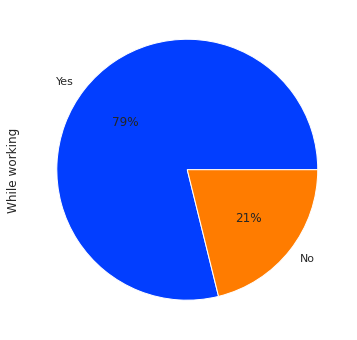

In [191]:
plt.figure(figsize=(8,6))
data['While working'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.savefig('6.png')

Around 80% people like to hear music while working.

Text(0.5, 0, 'Classical Music')

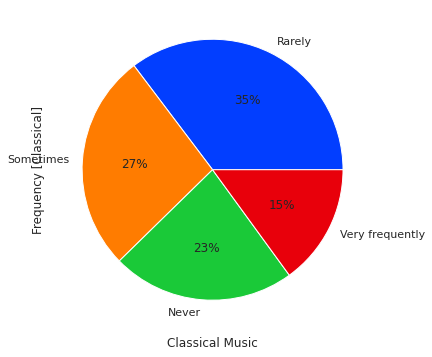

In [192]:
plt.figure(figsize=(8,6))
data['Frequency [Classical]'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.xlabel('Classical Music')

35% people very rarely listen Classical music.

22% people never listen classical music whereas 15% listen very frequently.

Text(0.5, 0, 'Country Music')

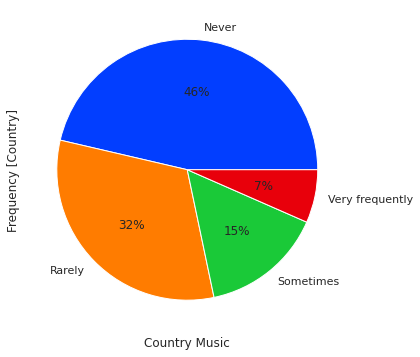

In [193]:
plt.figure(figsize=(8,6))
data['Frequency [Country]'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.xlabel('Country Music')

50% people nevel listen country music.

7% people listen is very frequently and 36% listen rarely.

Text(0.5, 0, 'EDM Music')

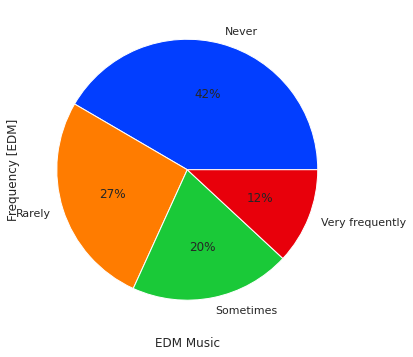

In [194]:
plt.figure(figsize=(8,6))
x=data['Frequency [EDM]'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.xlabel('EDM Music')

42% people never listen EDM music and 11% are very frequent with this music.

Text(0.5, 0, 'Folk Music')

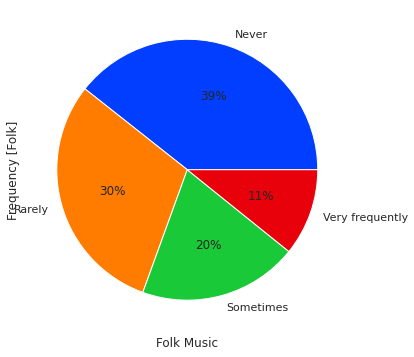

In [195]:
plt.figure(figsize=(8,6))
data['Frequency [Folk]'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.xlabel('Folk Music')

39% people never listen folk music and 10% are very frequently hear this music.

Text(0.5, 0, 'Gospel Music')

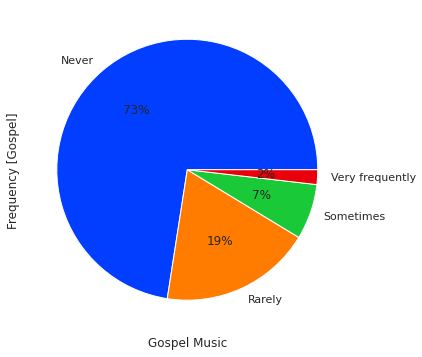

In [196]:
plt.figure(figsize=(8,6))
data['Frequency [Gospel]'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.xlabel('Gospel Music')

Gospel music is very unpopular between listeners almost 75% people not hear it.

Text(0.5, 0, 'Hip Hop Music')

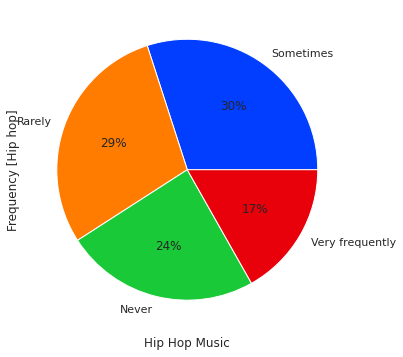

In [197]:
plt.figure(figsize=(8,6))
data['Frequency [Hip hop]'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.xlabel('Hip Hop Music')

Hip hop is quite heared music type. Although 23% people don't listen this but other than that eveyone hear it.

Text(0.5, 0, 'Jazz Music')

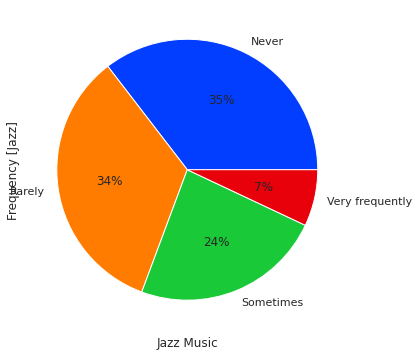

In [198]:
plt.figure(figsize=(8,6))
data['Frequency [Jazz]'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.xlabel('Jazz Music')

Jazz music is also very unheard music genres nowadays. Because 35% never hear this and 33% hear it rarely.

Text(0.5, 0, 'K Pop Music')

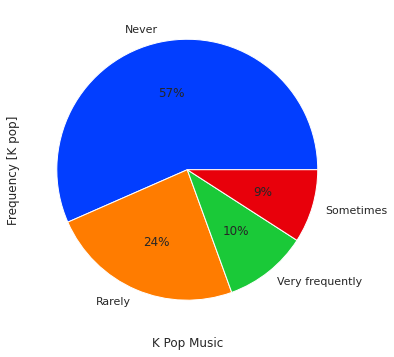

In [199]:
plt.figure(figsize=(8,6))
data['Frequency [K pop]'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.xlabel('K Pop Music')

This is also one of less heard music. 56% never hear this music.

Text(0.5, 0, 'Latin Music')

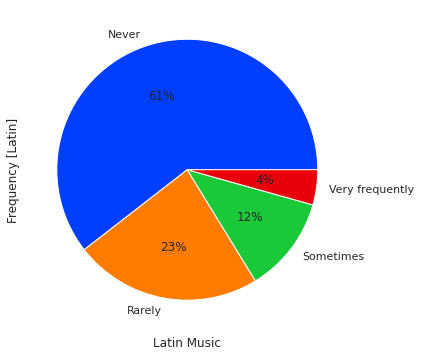

In [200]:
plt.figure(figsize=(8,6))
data['Frequency [Latin]'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.xlabel('Latin Music')

60% people never hear this music also.

Text(0.5, 0, 'Lofi Music')

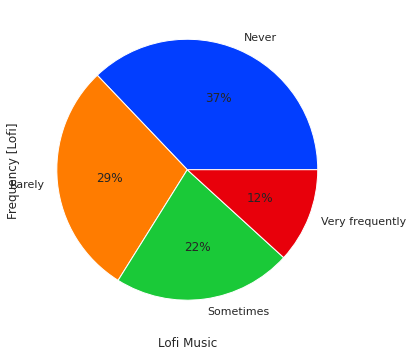

In [201]:
plt.figure(figsize=(8,6))
data['Frequency [Lofi]'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.xlabel('Lofi Music')

Never heard by 36% and 32% hear it more than rarely.

Text(0.5, 0, 'Metal Music')

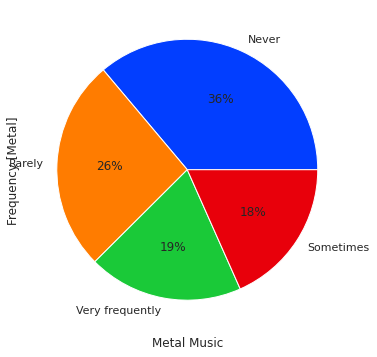

In [202]:
plt.figure(figsize=(8,6))
data['Frequency [Metal]'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.xlabel('Metal Music')

70% people hear this type of music whether it being heard sometimes or very frequently.

Text(0.5, 0, 'Pop Music')

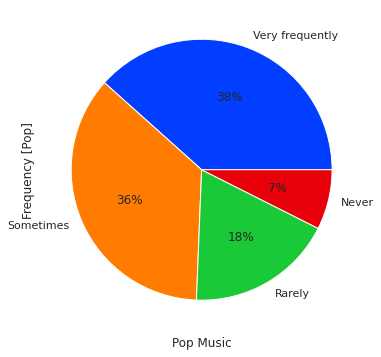

In [203]:
plt.figure(figsize=(8,6))
data['Frequency [Pop]'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.xlabel('Pop Music')

Pop music is very famous between listeners. Almost 93% hear it. Among these 36% hear it very frequently.

Text(0.5, 0, 'R&B Music')

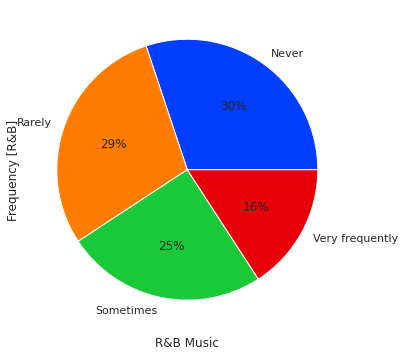

In [204]:
plt.figure(figsize=(8,6))
data['Frequency [R&B]'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.xlabel('R&B Music')

R&B is also somewhat very unpopular music genre. 30% people don't listen this. Among the other 70%, 28% people hear it rarely with 24% people who hear it sometimes.

Text(0.5, 0, 'Rap Music')

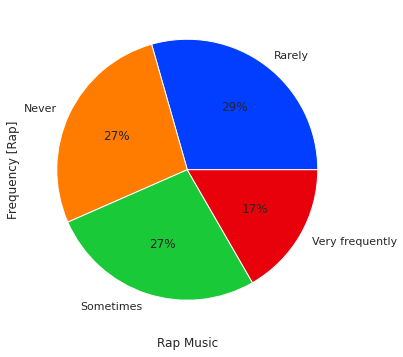

In [205]:
plt.figure(figsize=(8,6))
data['Frequency [Rap]'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.xlabel('Rap Music')

26% people never hear it while 30% hear it rarely.

Text(0.5, 0, 'Rock Music')

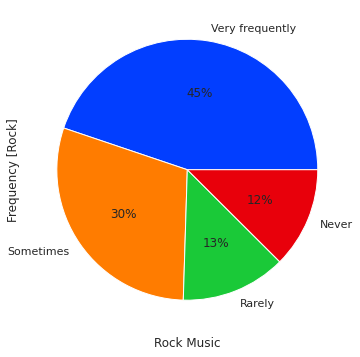

In [206]:
plt.figure(figsize=(8,6))
data['Frequency [Rock]'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.xlabel('Rock Music')

44% hear Rap music very frequently and 28% hear it sometimes which makes it very popular music genre.

Text(0.5, 0, 'Video Game Music')

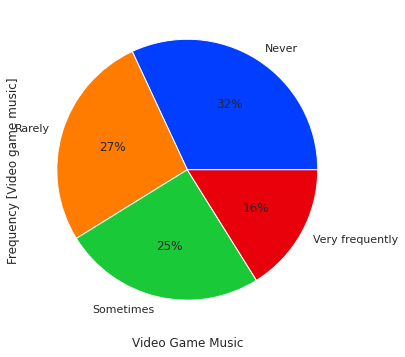

In [207]:
plt.figure(figsize=(8,6))
data['Frequency [Video game music]'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.xlabel('Video Game Music')

32% people never listen this music.

### **Bivariate Analysis**

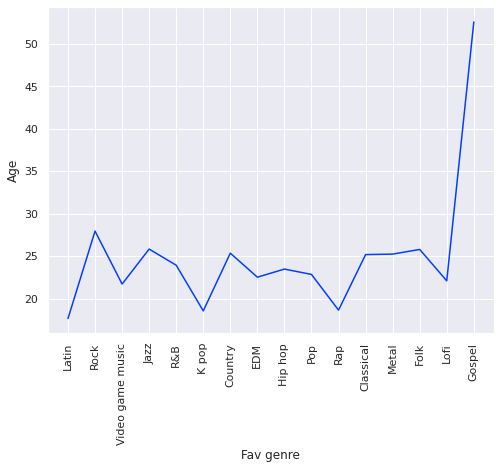

In [208]:
plt.figure(figsize=(8,6))
s10 = sns.lineplot(x=data['Fav genre'], y=data['Age'], ci=None)
plt.xticks(rotation=90)
s10.figure.savefig("0.png")

People around age of 20 are interested in *Latin*, *K pop* and *Rap* songs whereas *Gospel* is more famous in people around age of 50 and above.

Besides these above mentioned genre are heard by people from age of 20 to 30.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

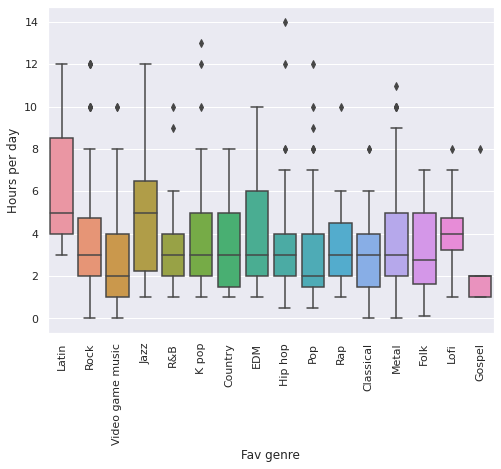

In [209]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Fav genre'], y=data['Hours per day'])
plt.xticks(rotation=90)

People work 12 hours a day use to listen *Latin* and *Jazz* genre music more.

People listening music of *Gospel* genre work less than others.

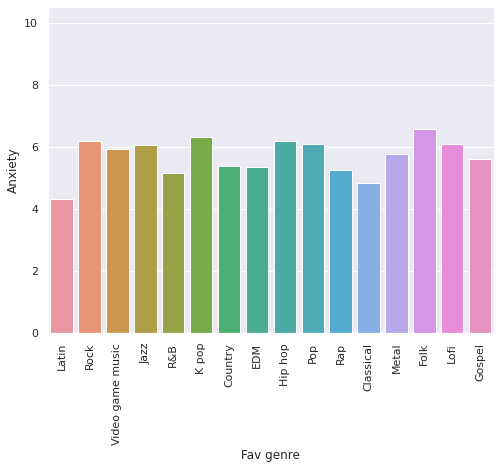

In [210]:
plt.figure(figsize=(8,6))
s9 = sns.barplot(x=data['Fav genre'], y=data['Anxiety'], errwidth=0)
plt.xticks(rotation=90)
s9.figure.savefig("s9.png")

Every listener has Anxiety level above 4 but *Rock*, *Jazz*, *K pop*, *Hip hop*, *Pop*, and *Folk* music listeners have anxiety level above 6.

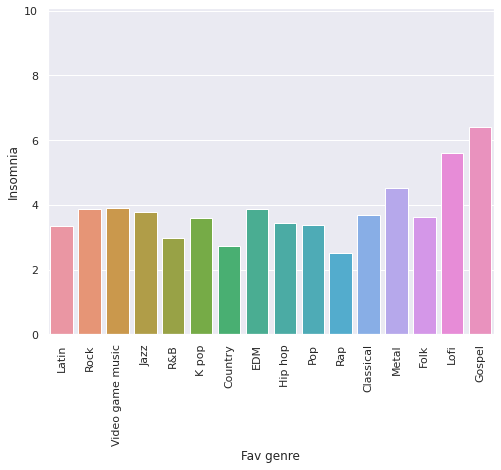

In [211]:
plt.figure(figsize=(8,6))
s8 = sns.barplot(x=data['Fav genre'], y=data['Insomnia'], errwidth=0)
plt.xticks(rotation=90)
s8.figure.savefig("s8.png")

Every listener have insomnia level below 4 besides *Metal*, *Lofi*, and *Gospel*.

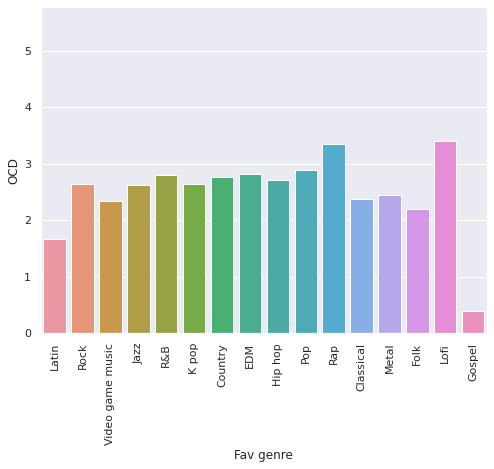

In [212]:
plt.figure(figsize=(8,6))
s7 = sns.barplot(x=data['Fav genre'], y=data['OCD'], errwidth=0)
plt.xticks(rotation=90)
s7.figure.savefig("s7.png")

The maximum OCD level is above 3 in *Rap* and *Lofi* listeners.

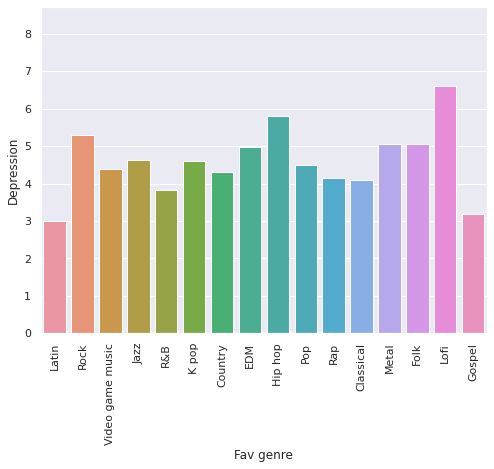

In [213]:
plt.figure(figsize=(8,6))
s6 = sns.barplot(x=data['Fav genre'], y=data['Depression'], errwidth=0)
plt.xticks(rotation=90)
s6.figure.savefig("s6.png")

Every listener has a Depression level above 3.

Lofi, Hip hop, and Rock listeners have Depression levels above 5.

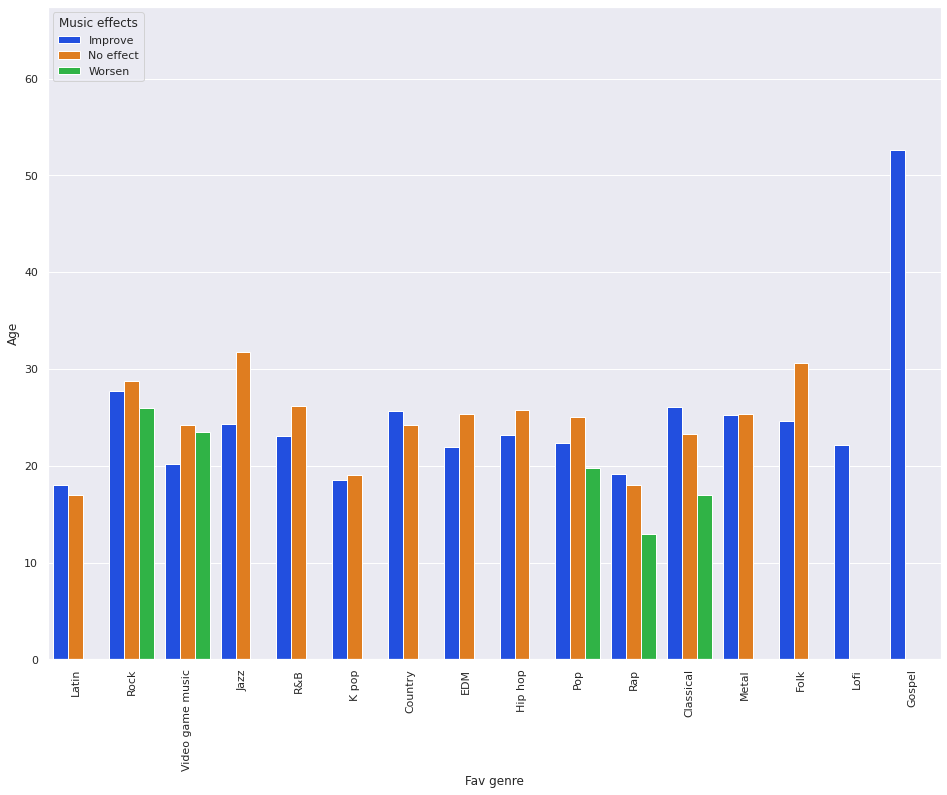

In [214]:
plt.figure(figsize=(16,12))
s5 = sns.barplot(x=data['Fav genre'], y=data['Age'], hue=data['Music effects'], errwidth=0)
plt.xticks(rotation=90)
s5.figure.savefig("s5.png")

Every Music listeners of every age showing some kind of improvement but *Rock*, *Video Game Music*, *Pop*, *Rap*, and *Classical* have worsen condition.

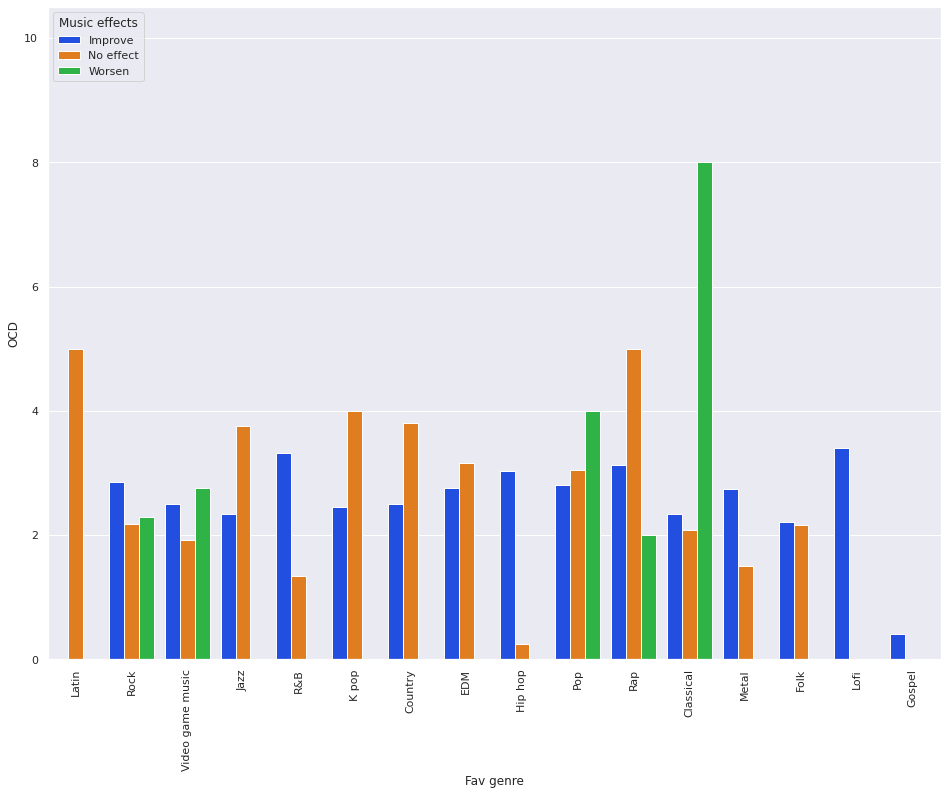

In [215]:
plt.figure(figsize=(16,12))
s4 = sns.barplot(x=data['Fav genre'], y=data['OCD'], hue=data['Music effects'], errwidth=0)
plt.xticks(rotation=90)
s4.figure.savefig("s4.png")

*Rock*, *Video Game Music*, *Pop*, *Rap*, and *Classical* listeners have some level of OCD but Classical listeners have highest OCD.

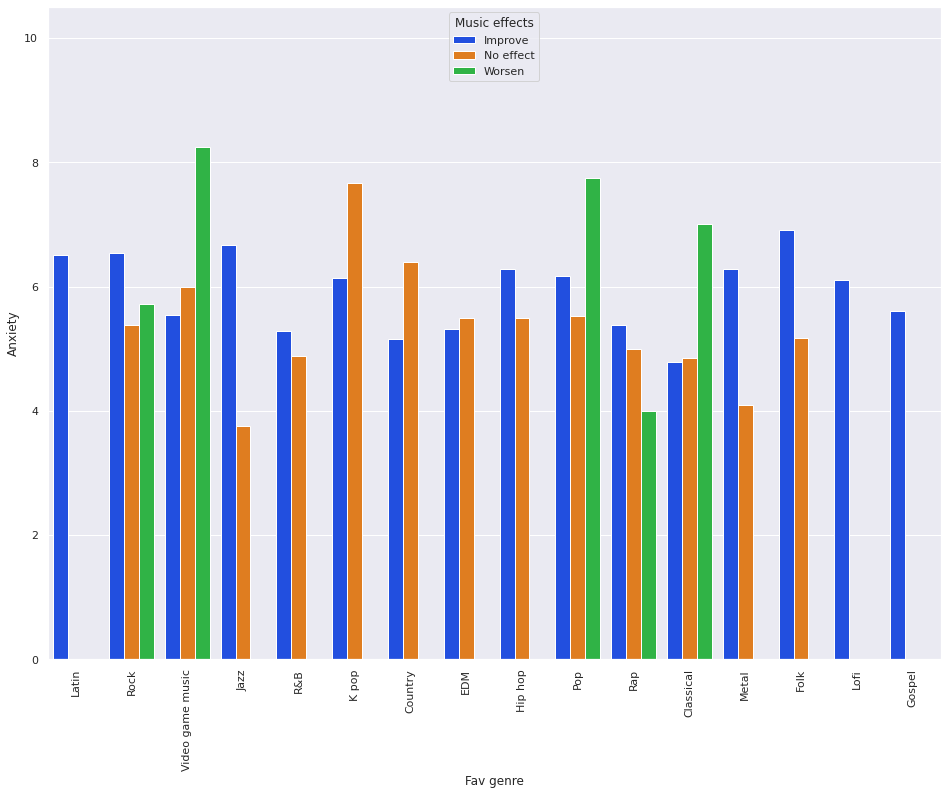

In [216]:
plt.figure(figsize=(16,12))
s3 = sns.barplot(x=data['Fav genre'], y=data['Anxiety'], hue=data['Music effects'], errwidth=0)
plt.xticks(rotation=90)
s3.figure.savefig("s3.png")

*Rock*, *Video Game Music*, *Pop*, *Rap*, and *Classical* listeners have some level of Anxiety but Video Game Music listeners have highest Anxiety.

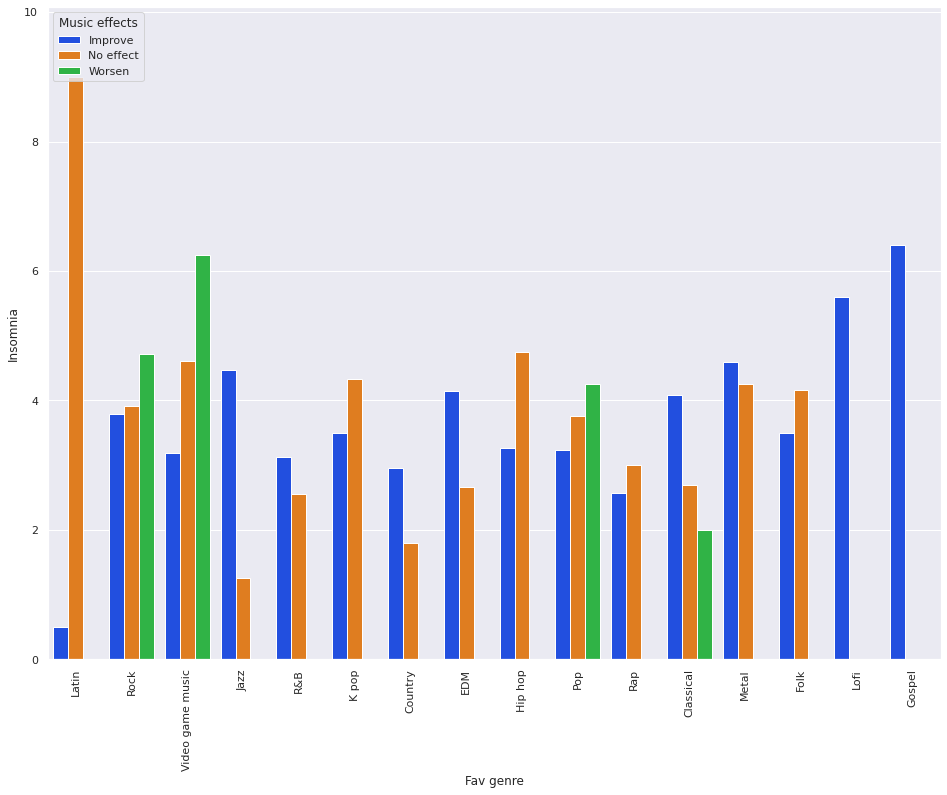

In [217]:
plt.figure(figsize=(16,12))
s2 = sns.barplot(x=data['Fav genre'], y=data['Insomnia'], hue=data['Music effects'], errwidth=0)
plt.xticks(rotation=90)
s2.figure.savefig("s2.png")

*Rock*, *Video Game Music*, *Pop*, and *Classical* listeners have some level of Insomnia but Video Game Music listeners have highest Anxiety.

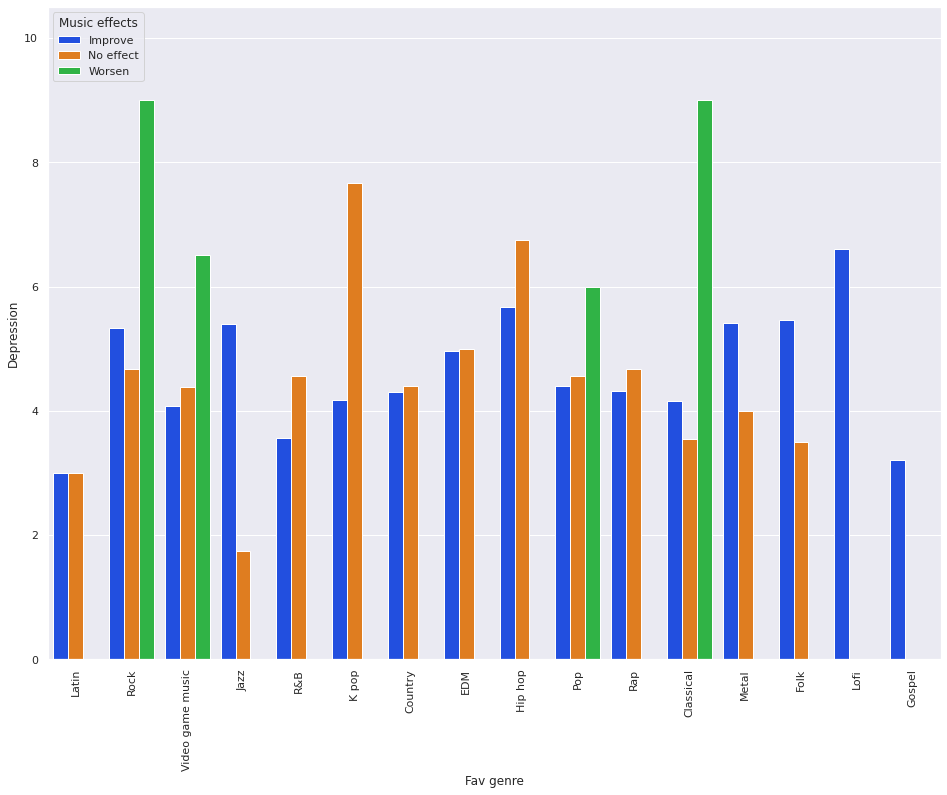

In [218]:
plt.figure(figsize=(16,12))
s1 = sns.barplot(x=data['Fav genre'], y=data['Depression'], hue=data['Music effects'], errwidth=0)
plt.xticks(rotation=90)
s1.figure.savefig("s1.png")

*Rock*, *Video Game Music*, *Pop*, and *Classical* listeners have high  level of Depression.

**This shows us Music works in both ways. It helps in our mental condition but in some cases it worsen our situation too.**